**Importando librerías**

In [ ]:
library(readr)
library(dplyr)
library(ggplot2)

**Cargando la data**

In [ ]:
datos <- read_csv("importancia.csv")

New names:
• `` -> `...2`
Rows: 201 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Marca temporal, Nombres:, Apellidos:, Sexo:, Carrera:, Lugares frec...
dbl (8): Código:, Edad:, Ciclo actual:, ¿Cuantas horas a la semana usas esto...
lgl (1): ...2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Renombrando las variables**

In [ ]:
part <- c("nombre" , "apellido" , "codigo" , "edad" , "sexo" , "ciclo" , "carrera" , "lugares" , "horasS" , "accesibilidad" , "dias" , "comodidad" , "incomodidad" , "aumentos" , "concentracion" , "apoyo")
datos <- datos[3:18]
colnames(datos) <- part
names(datos)

[1] "nombre"        "apellido"      "codigo"        "edad"         
 [5] "sexo"          "ciclo"         "carrera"       "lugares"      
 [9] "horasS"        "accesibilidad" "dias"          "comodidad"    
[13] "incomodidad"   "aumentos"      "concentracion" "apoyo"

# **Limpieza de datos**

In [ ]:
cambios <- c( " "=""
            , "á"="a"
            , "é"="e"
            , "í"="i")

In [ ]:
datos$lugares %>% str_replace_all(cambios) -> datos$lugares
datos$dias %>% str_replace_all(cambios) -> datos$dias
datos$incomodidad %>% str_replace_all(cambios) -> datos$incomodidad

# **Variables Categoricas**

**Sexo**

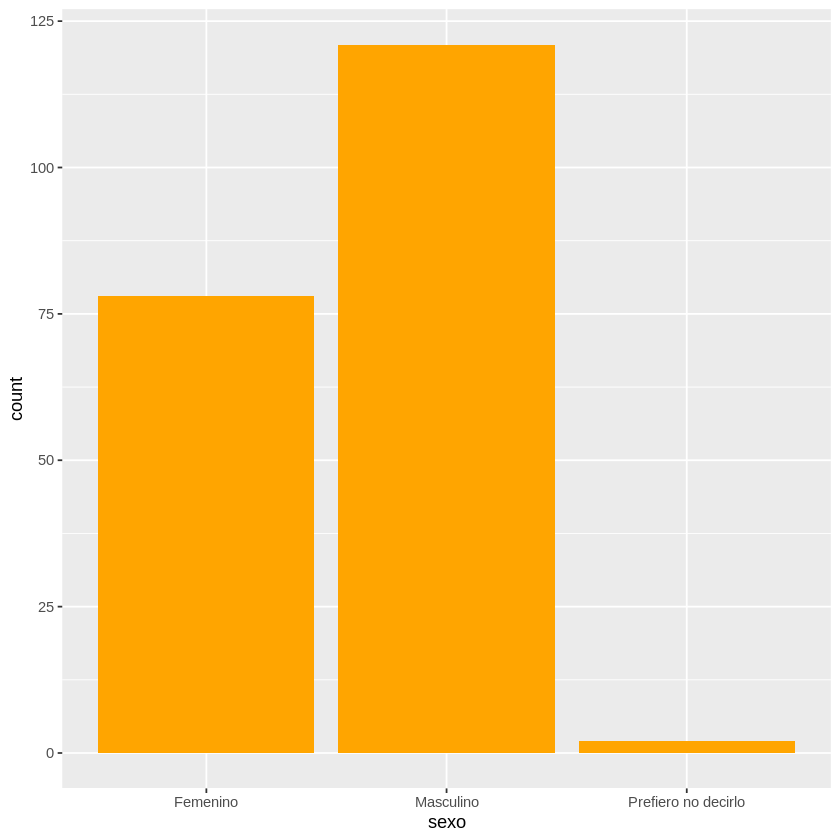

In [ ]:
ggplot(datos,aes(x=sexo)) +geom_bar(fill="orange")

**Carrera**

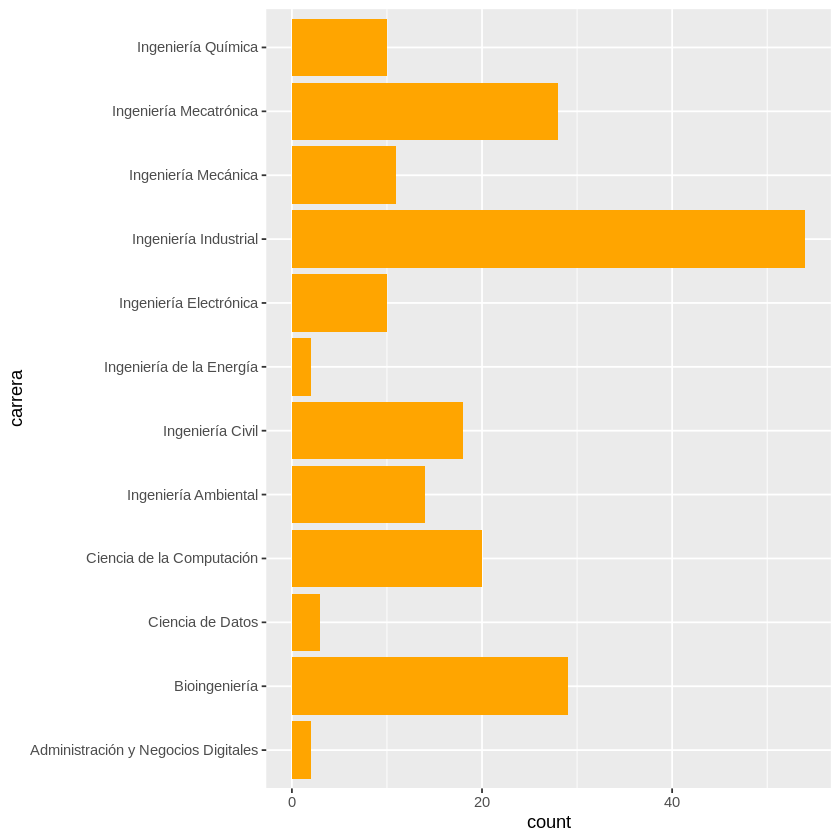

In [ ]:
ggplot(datos,aes(x=carrera)) +geom_bar(fill="orange")+ coord_flip()

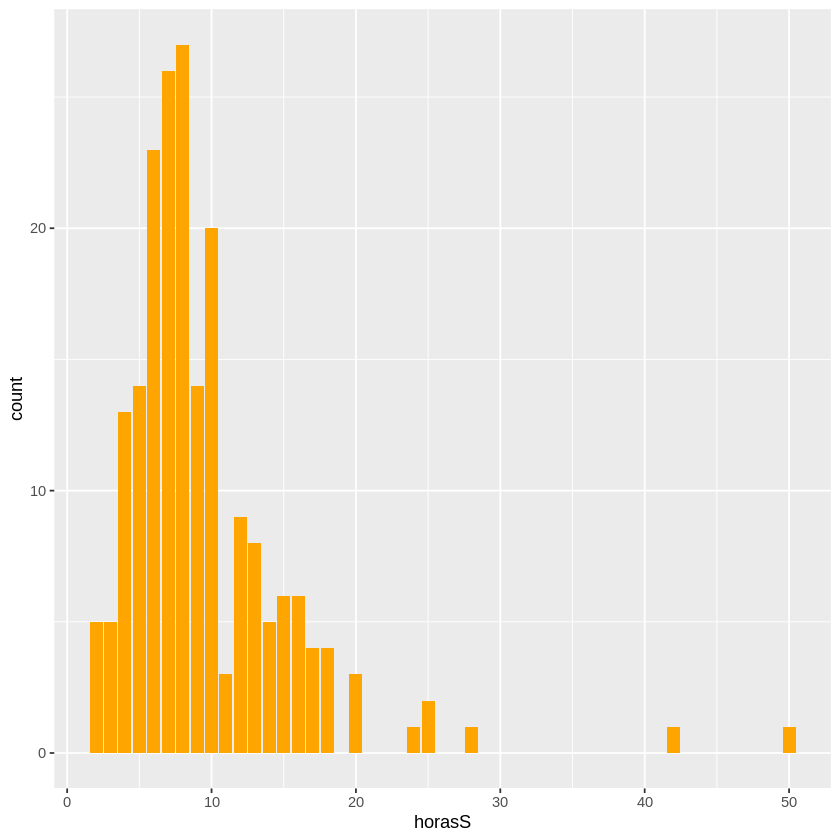

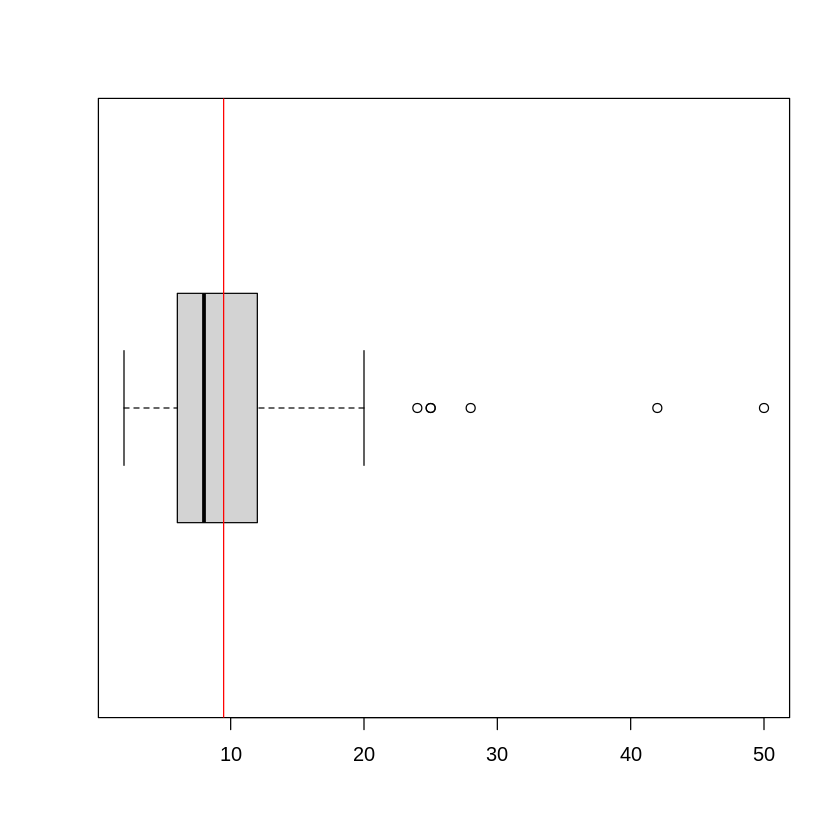

In [ ]:
ggplot(datos,aes(x=horasS)) +geom_bar(fill="orange")
boxplot(datos$horasS, horizontal = TRUE)
abline(v = c(mean(datos$horasS)), col = ("red"))

# **Relacion de variables**

**Acesibilidad por carrera**

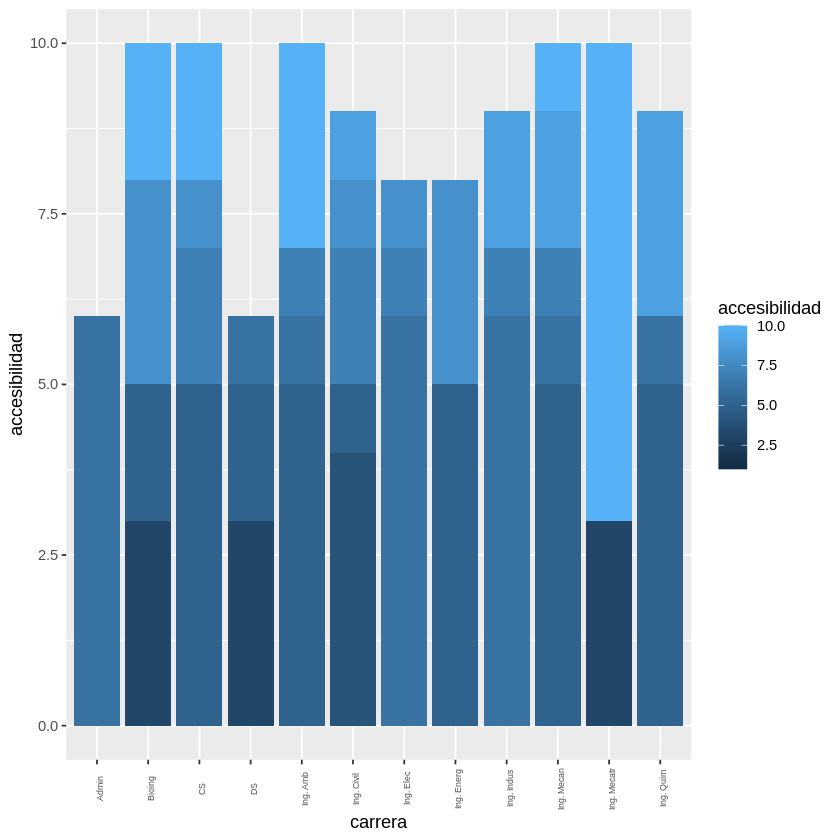

In [ ]:
carreras <- c(unique(datos$carrera))
newcarreras <- c("Ing. Mecan", "Ing. Mecatr", "Ing. Indus", "Ing. Energ", "Ing. Quim", "Bioing", "Ing. Civil", "CS", "Ing. Elec", "Ing. Amb", "Admin", "DS")
it <- 1
for (carr in carreras) {
    datos$carrera[datos$carrera == carr] <- newcarreras[it]
    it <- it + 1
}
ggplot(datos, aes(x=carrera,y=accesibilidad, fill=accesibilidad)) +
        geom_col(position="dodge") +
        theme(axis.text.x = element_text(size=rel(0.6), angle = 90))

**Apoyo por sexo**

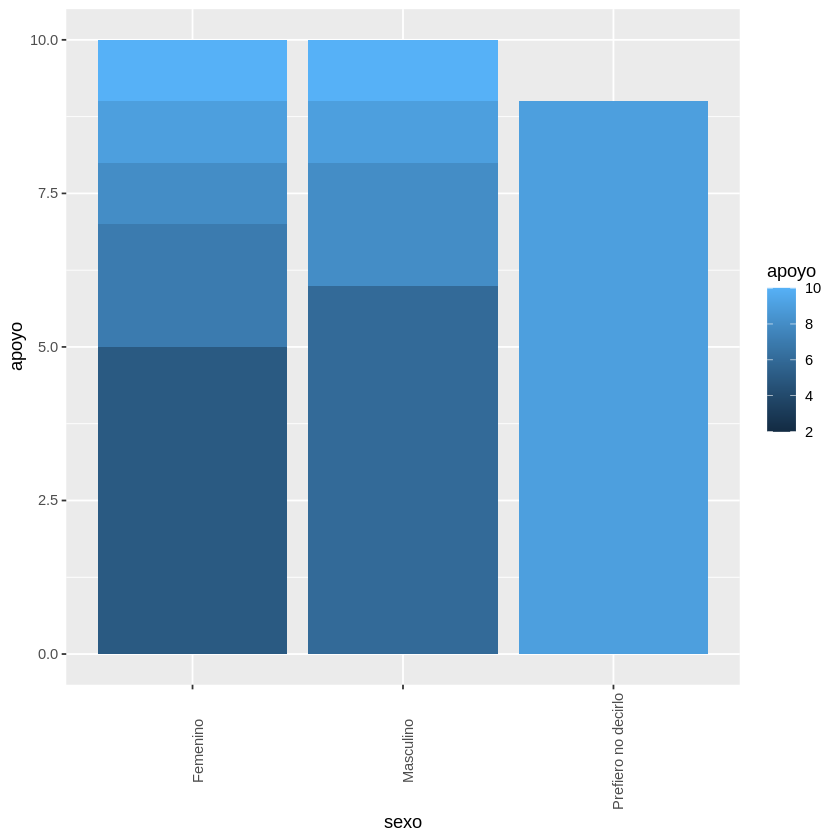

In [ ]:
ggplot(datos, aes(x=sexo,y=apoyo, fill=apoyo)) + 
        geom_col(position="dodge") +
        theme(axis.text.x = element_text(angle = 90))